In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('cpu_pass_blender_IM.csv')
data['cache'] = data['cache'].str.replace(' MB', '')
data

,name,price,core_count,core_clock,boost_clock,tdp,graphics,smt,codename,socket,...,supported_mem,supported_chipset,release_date,pmprice,cpuMark,threadMark,powerPerf,category,Blender Score,Number of Benchmarks
0,AMD Ryzen 5 5600X,168.99,6,3.7,4.6,65,NaN,True,Vermeer,Socket AM4,...,DDR4,"AMD 300 Series*, AMD 400 Series, AMD 500 Series","Nov 5th, 2020",216.99,22088,3377,339.82,Desktop,152.16,170
1,AMD Ryzen 7 5800X,228.72,8,3.8,4.7,105,NaN,True,Vermeer,Socket AM4,...,DDR4,"AMD 300 Series*, AMD 400 Series, AMD 500 Series","Nov 5th, 2020",333.99,28368,3485,270.17,Desktop,213.65,272
2,AMD Ryzen 5 5600,138.00,6,3.5,4.4,65,NaN,True,Vermeer,Socket AM4,...,DDR4,"AMD 300 Series*, AMD 400 Series, AMD 500 Series","Apr 20th, 2022",189.99,21350,3208,328.46,Desktop,154.46,129
3,Intel Core i5-12400F,149.97,6,2.5,4.4,65,NaN,True,Alder Lake-S,Socket 1700,...,"DDR4, DDR5","Intel 600 Series, Intel 700 Series","Jan 4th, 2022",174.98,19659,3567,302.44,Desktop,160.69,102
4,AMD Ryzen 7 5800X3D,329.99,8,3.4,4.5,105,NaN,True,Vermeer,Socket AM4,...,DDR4,"AMD 300 Series*, AMD 400 Series, AMD 500 Series","Apr 20th, 2022",599.00,25508,2850,242.93,Desktop,210.93,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Intel Xeon E5-1650,NaN,6,3.2,3.8,130,NaN,True,Sandy Bridge-E,Socket 2011,...,NaN,NaN,"Mar 6th, 2012",112.00,8113,1745,62.41,Server,54.02,3
216,Intel Xeon E5-2620,58.00,6,2.0,2.0,95,NaN,True,Sandy Bridge-EP,Socket 2011,...,NaN,NaN,"Mar 6th, 2012",75.65,5280,1112,55.58,Server,35.42,1
217,Intel Core i5-9400T,NaN,6,1.8,3.4,35,Intel UHD Graphics 630,False,Coffee Lake,Socket 1151,...,DDR4,NaN,"Sep 1st, 2018",182.00,7819,2057,223.39,Desktop,61.59,2
218,Intel Pentium G860,NaN,2,3.0,3.0,65,Intel HD Graphics,False,Sandy Bridge,Socket 1155,...,DDR3,NaN,"Sep 4th, 2011",22.93,1437,1389,22.11,Desktop,10.26,1


In [3]:
#CSV file has columns 'X' and 'y' for features and target
X = data[['core_count', 'boost_clock', 'tdp', 'smt', 'cpuMark']]
y = data['Blender Score']

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and train model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 380.35478181818195


In [4]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.9352375160462986


In [6]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 288.51733756120547
R² Score: 0.9508745509788171


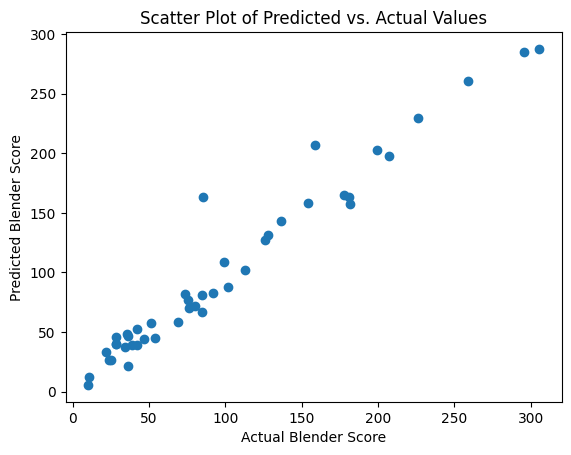

In [7]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Blender Score")
plt.ylabel("Predicted Blender Score")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()

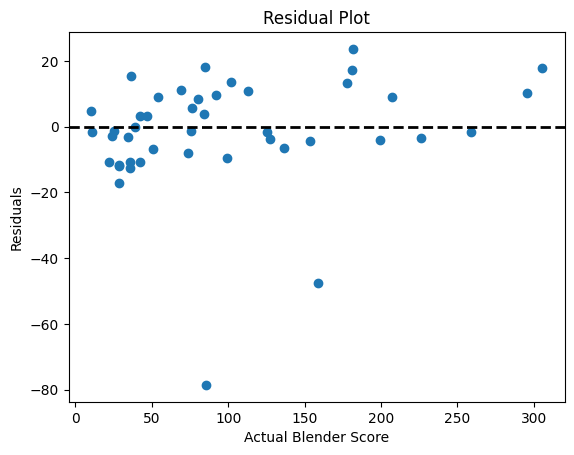

In [6]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual Blender Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

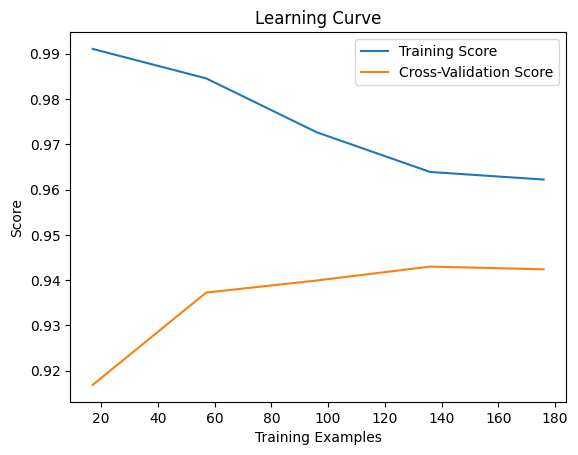

In [7]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [8]:
import pickle

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

save_model(model, 'PDblender.pkl')